In [5]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [6]:
# df = pd.read_csv("../CHR-data/ct_data/ACSDP5YSPT2010.DP03-Data.csv",skiprows=[1],low_memory=False)

path = '../CHR-data/'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
print(result)
df = pd.DataFrame()
ct = 0
using_filtered_data = 0
for each_csv in result:
    if ct == 0:
        ct+=1
        df = pd.read_csv(path+each_csv,skiprows=[1],low_memory=False)
    else:
        df = pd.merge(df, pd.read_csv(path+each_csv,skiprows=[1],low_memory=False), on=['ct']) 
#         print(df.columns)
        
print("Joined cols: ", df.columns)

['age_ct.csv', 'edu_ct.csv', 'ethnicity_ct.csv', 'gender_ct.csv', 'income_ct.csv', 'insurance_ct.csv', 'pop_ct.csv', 'poverty_ct.csv', 'race_ct.csv']
Joined cols:  Index(['ct', 'age_5', 'age_5_9', 'age_10_14', 'age_15_17', 'age_18_19',
       'age_20', 'age_21', 'age_22_24', 'age_25_29', 'age_30_34', 'age_35_39',
       'age_40_44', 'age_45_49', 'age_50_54', 'age_55_59', 'age_60_61',
       'age_62_64', 'age_65_66', 'age_67_69', 'age_70_74', 'age_75_79',
       'age_80_84', 'age_85', 'Total_x', 'NoSchoolingCompleted',
       'NurserySchool', 'Kindergarten', '1St_Grade', '2Nd_Grade', '3Rd_Grade',
       '4Th_Grade', '5Th_Grade', '6Th_Grade', '7Th_Grade', '8Th_Grade',
       '9Th_Grade', '10Th_Grade', '11Th_Grade', '12Th_Grade_NoDiploma',
       'HighSchoolDiploma', 'AlternativeCredential', 'College1Year',
       'College1MoreYears', 'Associate', 'Bachelor', 'Master',
       'ProfessionalSchool', 'Doctorate', 'pop_x', 'no_hispanic', 'hispanic',
       'male', 'female', 'family_income', '

In [7]:
print("Dataset with all counties: ", df.shape)
df_filtered = df[(df['ct'] >= 55000000000) & (df['ct'] <= 56000000000) ]
print("Dataset with wisconsin counties: ", df_filtered.shape)

   

Dataset with all counties:  (74000, 94)
Dataset with wisconsin counties:  (1409, 94)


In [8]:
# No need to remove data for the new csvs
import copy
if using_filtered_data:
    col_names = pd.Series(df.columns)
    useful_idx = ["GEO_ID"]
    useful_idx.extend(col_names[col_names.apply(lambda x: x[-1]=="E")])

    print('Before remove',len(useful_idx))
    copy_idx = copy.copy(useful_idx)
    for metric in copy_idx:
        if df[metric][0] == '(X)':
            useful_idx.remove(metric)
    print('After removing: ', len(useful_idx))
    df = df[useful_idx]
    df.shape
    df["GEO_ID"] = df["GEO_ID"].apply(lambda x:x[-11:])

else:
    print("Using filtered data")
    


Using filtered data


In [9]:
df_filtered.head(1)

,ct,age_5,age_5_9,age_10_14,age_15_17,age_18_19,age_20,age_21,age_22_24,age_25_29,...,1.85-1.99,2.00,pop,white,black,native,asian,hawaiian,other,two
71514,55001950100,104,75,110,86,51,2,1,9,66,...,207,2233,2935,2853,0,7,0,0,0,75


(1409, 13)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55,009,940002,55009940002,9400.02,Census Tract 9400.02,G5020,S,11512825,17646,+44.5153993,-088.1275536,"POLYGON ((-88.15018 44.51202, -88.15010 44.513..."


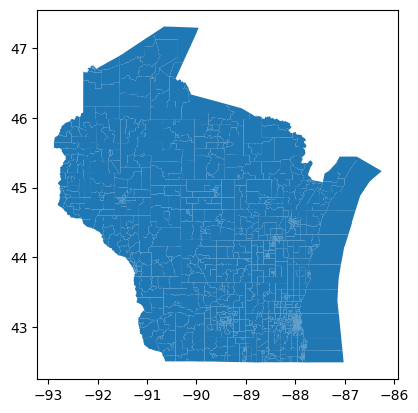

In [20]:
geo = gpd.read_file("zip://../ct_data/tl_2019_55_tract.zip")
geo.plot()
print(geo.shape)
geo.head(1)

In [ ]:
# geo["GEOID"] = geo["GEOID"].apply(lambda x:x[-10:])
# geo.head(1)

In [12]:
# df_filtered['ct']=df_filtered['ct'].astype(np.int64)
geo['GEOID']=geo['GEOID'].astype(np.int64)
joined = gpd.GeoDataFrame(pd.merge(df_filtered,geo,how="left",left_on="ct",right_on = "GEOID"))


In [13]:
joined

,ct,age_5,age_5_9,age_10_14,age_15_17,age_18_19,age_20,age_21,age_22_24,age_25_29,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,104,75,110,86,51,2,1,9,66,...,55001950100,9501,Census Tract 9501,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,43,31,65,33,14,2,6,52,37,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,31,104,95,65,38,20,15,28,69,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,+44.0888085,-089.7705744,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,55001950400,162,348,205,164,62,27,58,170,252,...,55001950400,9504,Census Tract 9504,G5020,S,235590227,1195071,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,79,50,46,19,33,0,25,60,45,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,55141011300,115,198,303,101,42,16,0,191,164,...,55141011300,113,Census Tract 113,G5020,S,12013212,1425599,+44.3643651,-089.8372719,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1405,55141011400,335,286,228,213,94,53,0,167,342,...,55141011400,114,Census Tract 114,G5020,S,11657150,341824,+44.3673095,-089.8033856,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1406,55141011500,259,305,477,259,94,33,59,55,174,...,55141011500,115,Census Tract 115,G5020,S,33527893,605288,+44.3654643,-089.7591255,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1407,55141011600,242,202,218,198,143,40,7,161,192,...,55141011600,116,Census Tract 116,G5020,S,128689803,4188672,+44.2849618,-089.7980036,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


<AxesSubplot:>

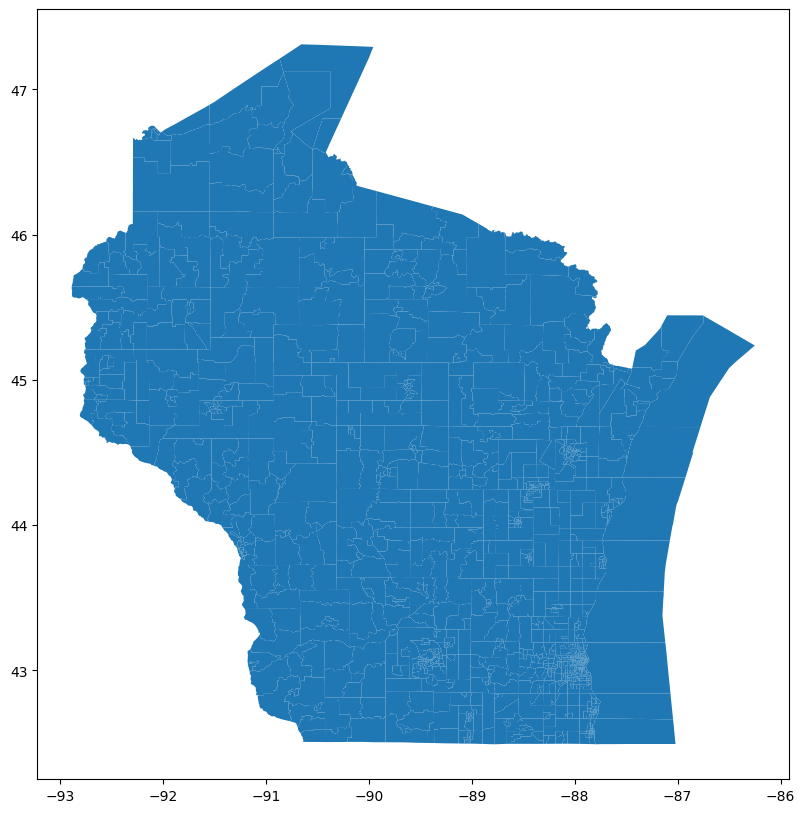

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
joined[joined["geometry"].notnull()].plot(ax=ax)

In [15]:
joined[joined["geometry"].isnull()]

,ct,age_5,age_5_9,age_10_14,age_15_17,age_18_19,age_20,age_21,age_22_24,age_25_29,...,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry


In [ ]:
# joined2 = pd.merge(geo,df,how="left",left_on="GEOID",right_on = "GEO_ID")

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# joined2[joined2["DP03_0133PE"].isnull()].plot(ax=ax)

In [ ]:
# not_joined_attr = joined[(joined["geometry"].isnull())]
# not_joined_geo = joined2[(joined2["DP03_0133PE"].isnull())]

In [ ]:
# not_joined_geo

In [ ]:
# not_joined_attr

In [ ]:
#final joined data
# joined

In [18]:
joined.to_csv("../joined_data_CHR.csv",index=False)

In [ ]:
#joined.to_file("data/WIct.shp")